<a href="https://colab.research.google.com/github/lsteffenel/CHPS0704/blob/main/TP2.3-Analyse_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TP2.3 Analyse de données :
# PRÉDICTION DE DIABÈTE
## 1.	 Préparation des données



Cet ensemble de données provient d’une extraction fournie par un Institut du diabète. Pour vous faciliter la munipulation, la base de données est disponible sur le fichier `diabetes_2.csv`

L'objectif de cet ensemble est de construire un outil permettant de réaliser un diagnostic positif ou négatif de la présence d'un diabète chez un patient. Plusieurs contraintes ont été placées sur la sélection de ces instances dans la base de données d'origine (bien plus volumineuse). En particulier, tous les patients ici sont des femmes âgées d'au moins 21 ans.

Les ensembles de données comprennent plusieurs variables prédictives médicales et la variable cible « _Outcome_ » dont la valeur _1_ signifie que la patiente est diabétique et la valeur _0_ qu'il ne l'est pas.  
Les variables prédictives comprennent le nombre de grossesses que le patient a eues, son IMC, son taux d'insuline, son âge, etc.

Chaque ligne représente un patient et les colonnes sont :
-	_Grossesses_ : nombre de fois où la patiente a déjà été enceinte
-	_Glucose_ : concentration en glucose plasmatique 2 heures dans un test de tolérance au glucose par voie orale
-	_BloodPressure_ : pression artérielle diastolique (mm Hg)
-	_SkinThickness_ : épaisseur du pli cutané des triceps (mm)
-	_Insuline_ : insuline sérique de 2 heures (mu U / ml)
-	_BMI_ : IMC : indice de masse corporelle (poids en kg / (taille en m) ^ 2)
-	_DiabetesPedigreeFunction_ : Fonction pédigrée du diabète
-	_Age_ : age (ans)
-	_Outcome_ : Variable de classe dont les états sont soit 1 (diabète), soit 0 (non diabète).


## Étape 1 : Lecture des données

Grâce à la bibliothèque '_pandas_', nous pouvons manipuler notre jeux de données : lire, écrire, stocker, visualiser, supprimer des lignes, des colonnes, créer des dataframes, etc.

In [4]:
# importer la lib pandas pour le traitement sur le jeux de données
import pandas as pd

### Documentation Pandas
Consulter le lien https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html pour rechercher les informations sur les fonctionnalités présentes dans le code ci-dessous :


In [2]:
!wget https://raw.githubusercontent.com/lsteffenel/CHPS0704/main/data/diabetes_2.csv

--2024-09-12 08:43:19--  https://raw.githubusercontent.com/lsteffenel/CHPS0704/main/data/diabetes_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes_2.csv’

diabetes_2.csv      100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2024-09-12 08:43:20 (9.42 MB/s) - ‘diabetes_2.csv’ saved [23873/23873]



In [5]:
# read the csv-formatted data file into a pandas dataframe
df=pd.read_csv('diabetes_2.csv')
# get shape of data frame
print('Shape (n_rows,n_columns) of dataframe:',df.shape)
# print top 5 rows (default) of the data frame
df.head()

Shape (n_rows,n_columns) of dataframe: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Manipuler le jeux de données en utilisant quelques commandes de Pandas

### Sélection d'une (ou plusieurs) colonne(s) comme un nouveau dataframe et affichage uniquement les 5 premières lignes.


In [6]:
df2=df[['Outcome','Pregnancies','Insulin']].head()
df2

,Outcome,Pregnancies,Insulin
0,1,6,0
1,0,1,0
2,1,8,0
3,0,1,94
4,1,0,168


In [7]:
df3=df[['Age']].head()
df3

,Age
0,50
1,31
2,32
3,21
4,33


### Sélection des données qui satisfont une condition, et calcul de leur nombre.


In [8]:
# Le premier élément est le nombre de lignes, le second est celui de colonnes:
print(df[df.BMI>30].shape)
# le premier élément (nbr lignes) a pour indice 0, le second (nbr colonnes) 1.
print('The number of rows where BMI>30 = ',df[df.BMI>30].shape[0])

(465, 9)
The number of rows where BMI>30 =  465


In [ ]:
# A nouveau les 5 premiers enregistrements
df[df.BMI<10].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [ ]:
# On peut observer le comportement par défaut avec cette commande :
df.BMI>30

0       True
1      False
2      False
3      False
4       True
       ...  
763     True
764     True
765    False
766     True
767     True
Name: BMI, Length: 768, dtype: bool

## Exercice 1
### Question 1.1
1. Faire une sélection des données pour lesquelles le glucose est supérieur à 90, _puis en_
1. Sélectionner uniquement les colonnes: Outcome, BMI, and Age, _puis en_
1. Sélectionner uniquement les 8 premières lignes.

<!-- df[df.Glucose>90][["Outcome","BMI","Age"]].head(8) -->

### Question 1.2
1. Faire une sélection des enregistrements où le glucose est entre 90 et 130, _puis en_
1. Sélectionner uniquement les colonnes: Outcome, BMI, and Age, _puis en_
1. Sélectionner uniquement les 6 premières lignes.

<!-- df[(df.Glucose>90)&(df.Glucose<130)][["Outcome","BMI","Age"]].head(6) -->

In [ ]:
# Votre code ici

### Question 1.3
1. Sélectionner les données qui ont Outcome = 1 et Pregnancies>0, _puis_
1. Se restreindre aux seules colonnes Glucose et BloodPressure, _puis_
1. Se restreindre aux 3 premieres lignes du dataframe résultant.
<!--
df[ (df.Outcome==1) & (df.Pregnancies>0) ] [ ["Glucose","BloodPressure"] ] . head(3)
-->

### Question 1.4

Dans ce jeux de données, combien de personnes présentant un diabète ont une tension artérielle supérieur à 70 ?
<!--
  df[ (df.Outcome==1) & (df.BloodPressure>70)] . count()
-->

In [ ]:
# Votre code ici


### Savoir si notre jeux de données possède des champs vides (non renseignés) ?

In [ ]:
# Nombre de cellules nulles (non renseignées) par colonnes
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Nombre de cellules non nulles (donc renseignées) par colonnes
df.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

### Afficher la liste des colonnes

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Afficher le type de données des colonnes

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Avoir un résumé statistique de notre Dataframe

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Notez que le "nombre" de valeurs pour chaque colonne est le même que le nombre de lignes dans le bloc de données. Cela signifie qu'il n'y a pas de valeurs manquantes (NULL).

### Combien y a-t-il de diagnostics ?

In [ ]:
df.Outcome.value_counts()
#df.Insulin.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Quelle est la moyenne de l'épaisseur de la peau des patientes dont le diagnostic est le diabète  ?

In [ ]:
# Il y a plein de manière d'écrire cette commande
df[df.Outcome==1].SkinThickness.mean()

22.16417910447761

In [ ]:
# Ou
df[df["Outcome"]==1].SkinThickness.mean()

22.16417910447761

In [ ]:
# Ou encore...
df[df["Outcome"]==1]["SkinThickness"].mean()

22.16417910447761

### Question 1.5
Quel est le maximum du "_BMI_" lorsque la patiente n'est pas atteinte par le diabète ?
<!-- df[df["Outcome"]==0].BMI.max() -->

## Étape  2 : Visualisation des données

La visualisation des données est une étape très importante dans l'analyse des données.  
_NB : Consultez ce lien pour la documentation de Matplot Scatter:   https://matplotlib.org/gallery/index.html_

In [ ]:
# get a plotting library
import matplotlib.pyplot as plt
# make it interactive in the notebook (Only needed for that librairy)
%matplotlib inline

Première analyse visuelle par des  diagrammes de dispersion (scatter plot)

Text(0, 0.5, 'Glucose')

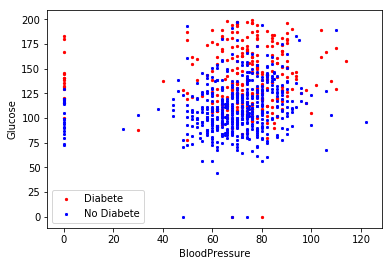

In [ ]:
# plot Glucose vs BloodPressure and color points according to Outcome
plt.figure()
plt.scatter(df[df.Outcome==1].BloodPressure,df[df.Outcome==1].Glucose,label='Diabete',color='r', marker="o",s=5)
plt.scatter(df[df.Outcome==0].BloodPressure,df[df.Outcome==0].Glucose,label='No Diabete',color='b',marker="x",s=5)
plt.legend()
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')

Remarquez qu'on peut constater que plus le taux de glucose est élevé, plus l'enregistrement est associé à un diabète (résultat = 1, points rouges), tandis que plus il est bas, et plus il est associé à l'absence du diabète (résultat = 0, points bleus).

Notez également qu'il y a un ensemble de points de valeur 0 pour _Glucose_ et un autre de valeur 0 pour _BloodPressure._ Cela n'a pas de sens physiologiquement (les patientes seraient mortes). Il semble dont que ces données ont été remplies avec 0 alors que la valeur aurait dû être _NULL_.  
Vérifions combien de zéros apparaissent dans chaque colonne.

In [ ]:
# Récupération du plus long nom de colonne
dimension = max( [ len(c) for c in df.columns ] )
print(dimension)


# Pour chacune des colonnes
for c in df.columns:
    print(
        df[df[c]==0][c].count(),'zero values'
        )



24
111 zero values
5 zero values
35 zero values
227 zero values
374 zero values
11 zero values
0 zero values
0 zero values
500 zero values


Pour certaines de ces colonnes, 0 a un sens, comme pour le nombre de grossesses (_Pregnancies_) ou  le résultat (_Outcome_). Mais pour d'autres colonnes, comme _BloodPressure_ ou _BMI_, zéro n'a absolument aucun sens.  
Examinons de plus près les données en dessinant un histogramme des valeurs pour chaque colonne.

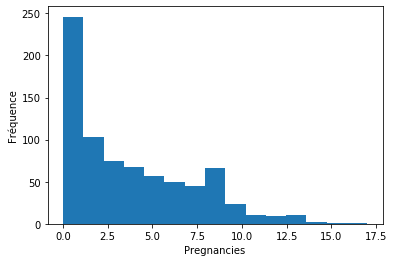

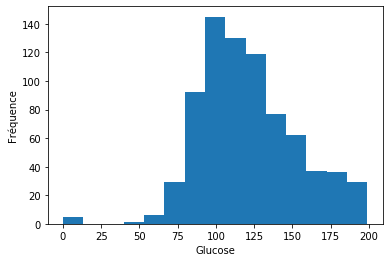

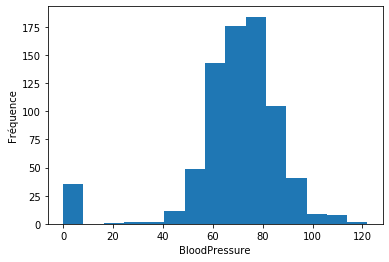

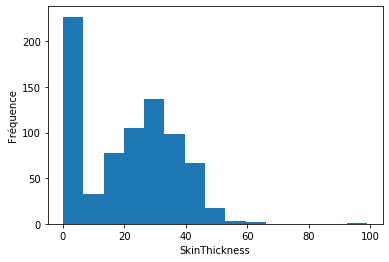

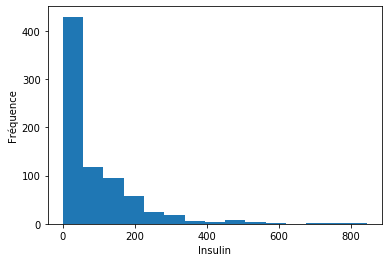

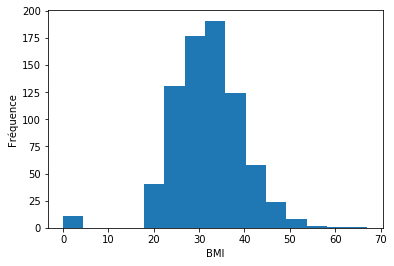

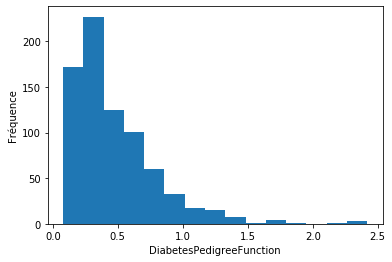

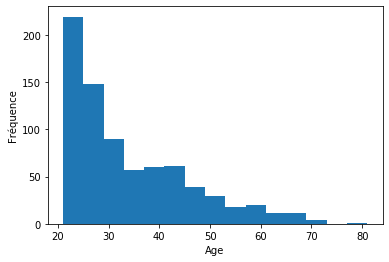

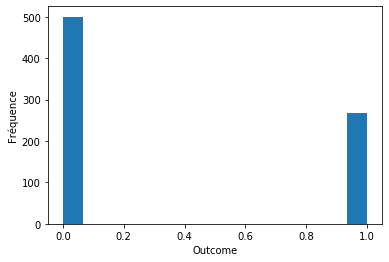

In [ ]:
# Pour chacun des attributs
for c in df.columns:
    plt.figure()               # On construit un nouveau dessin
    plt.hist(df[c],bins=15)    # On regroupe les valeurs de la colonne 'c' par plage de largeur 15
    plt.xlabel(c)              # On donne le nom de l'attribut pour l'abscisse
    plt.ylabel('Fréquence')    # On nomme l'axe des ordonnées "Fréquence"
    plt.show()                 # On demande l'affichage

À partir de ces histogrammes, il semble que bon nombre de valeurs à 0 sont en effet des données dont la valeur manquait et qui auraient dû être étiquetées NULL. Elles devront être prises en compte avant que nous formions un modèle pour classer les données.

De plus, nous pouvons remarquer que la colonne _Insuline_ n'a que 374 valeurs renseignées (sur un total de 768 lignes), soit presque 50% des valeurs sont des 0.

Dans l'étape 3 où nous traiterons les cas d'inconsistance des données, nous supprimerons la colonne d'insuline, car beaucoup de ses valeurs sont manquantes.  Ensuite, nous remplacerons les zéros dans les colonnes où zéro n'a pas de sens. Nous ferons le choix d'utiliser la moyenne des valeurs non nulles dans chaque colonne pour remplacer ces valeurs nulles.

_NB : il ne faudra pas oublier lors de l'analyse finale des résultats de vérifier que ces hypothèses sont pertinentes (valides) sous peine d'avoir introduit des biais ou des erreurs importantes. Une connaissance experte du domaine est alors très souvent nécessaire._


### EXERCICE 2 :

En vous appuyant sur les 2 exemples de code ci-dessous, inspecter chacune des caractéristiques. Vous recherchez en particulier une caractéristique dont un seuil permettrait de scinder efficacement l'ensemble de enregistrements en 'Diabète' et 'Non diabète'.

#### Visualisation des nuages de points/graphes de dispersion.

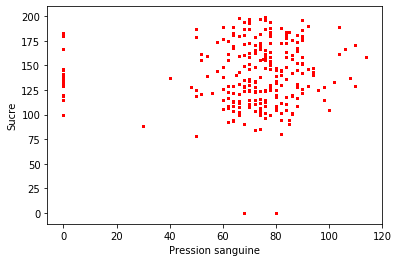

In [ ]:
# Exemple 1 : Visualisation de liaison entre Sucre et Pression artérielle
#             pour les patientes diabétiques en utilisant un ScatterPlot
plt.figure
for c in df.columns:
    plt.scatter(
        df[df.Outcome==1].BloodPressure,
        df[df.Outcome==1].Glucose,
        label='Diabete',
        color='r',
        s=3
    )
    plt.xlabel("Pression sanguine")
    plt.ylabel("Sucre")



#### Superposition d'histogrammes

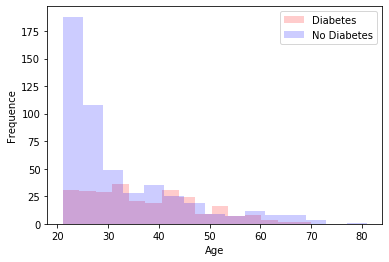

In [ ]:
# Exemple 2 : superposition des histogrammes de l'Age en fonction du diabète
plt.figure()
plt.hist(df[df.Outcome==1]['Age'],bins=15,label='Diabetes',color='r',alpha=0.2)
plt.hist(df[df.Outcome==0]['Age'],bins=15,label='No Diabetes',color='b',alpha=0.2)
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.legend()
plt.show()

### Question 2.1
Choisir la colonne (l'attribut) qui, pour vous, maximise visuellement l'efficacité de la séparation.  Vous expliciterez votre démarche.

### Question 2.2
En vous inspirant du code ci-dessous, où l'on fait l'hypothèse que l'âge est l'attribut discriminant avec un seuil à 30 ans, calculer le degré d'exactitude de votre classificateur ?
_NB : Pour la documentation sur Numpy visitez le lien : https://docs.scipy.org/doc/numpy/user/quickstart.html_


In [ ]:
import numpy as np
# create a new column in the data frame with the predicted outcome based on your split
#   (here, Age<30 means outcome=0, otherwise outcome=1)
df['PredictedOutcome']=np.where(df.Age<100,0,1)
# calculate accuracy
N_correct=df[df.PredictedOutcome==df.Outcome].shape[0]
N_total=df.shape[0]
accuracy=N_correct/N_total
print('number of correct examples =',N_correct)
print('number of examples in total =',N_total)
print('accuracy =',accuracy)

number of correct examples = 500
number of examples in total = 768
accuracy = 0.6510416666666666


In [ ]:
# Votre code ici


Il existe de nombreuses mesures pour calculer la qualité d'un classificateur. (Je vous invite à faire une petite recherche sur le sujet).

## Étape 3 :
  La préparation des données pour le traitement se divise en 2 sous-étapes :
  1. Correction de l'ensemble initial ;
      - Nous avons remarqué que la colonne _Insuline_ était insuffisamment renseignée et nous allons la retirer
      - Certaines valeurs à 0 doivent(/peuvent) être remplacées par la moyenne
  1. Division de l'ensemble de données en un ensemble d'entrainement et un ensemble de test (TRAIN/TEST)


#### Retrait des données non pertinentes ou incorrectes

In [ ]:
# Retrait physique de la colonne _Insulin_ (axis=1 signifie par son nom)
donnees = df
donnees.drop('Insulin',axis=1,inplace=True)
# où l'on voit bien que l'objet 'donnees' est bien le même objet que 'df' !!!
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PredictedOutcome'],
      dtype='object')

#### Création des sous-ensemble d'entrainement et de test
On réalise ce découpage avant le remplacement de valeur afin de pouvoir utiliser les statistiques de chacun de ces ensembles.


In [ ]:
# Avec la fonction train_test_split de sklearn on peut facilement diviser notre dataframe
# en ensembles train/test
import sklearn
from sklearn.model_selection import train_test_split
# 0,3 pour préciser que 30% seront pour l'ensemble de test et 70% pour l'entrainement
train, test = train_test_split(donnees, test_size = 0.3, random_state = 0)

# Visualisaton des ensembles
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,PredictedOutcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.00000,537.000000,537.000000,537.0
mean,3.854749,121.543762,69.666667,21.031657,32.255121,0.47132,33.670391,0.361266,0.0
std,3.405075,32.242413,19.464823,16.030548,8.034497,0.33441,12.003471,0.480815,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.08400,21.000000,0.000000,0.0
25%,1.000000,99.000000,64.000000,0.000000,27.500000,0.24000,24.000000,0.000000,0.0
50%,3.000000,118.000000,72.000000,24.000000,32.400000,0.37800,29.000000,0.000000,0.0
75%,6.000000,142.000000,80.000000,33.000000,36.800000,0.61300,41.000000,1.000000,0.0
max,17.000000,198.000000,122.000000,99.000000,67.100000,2.42000,81.000000,1.000000,0.0


#### Traitement des valeurs manquantes

In [ ]:
# La bibliothèque numpy offre plusieurs fonctions très utiles. Par exemple, elle nous permet de créer une nouvelle colonne dans notre
# dataframe si une condition est satisfaite
import numpy as np

def imputeColumns(dataset):
    """ Pour chacune des colonnes du dataset,
        mise à jour des valeurs à zero par la moyenne de ses valeurs non nulles.
    """
    # liste des colonnes qui seront traitées
    columnsToImpute=['Glucose', 'BloodPressure', 'SkinThickness','BMI']

    for c in columnsToImpute:
        avgOfCol=dataset[dataset[c]>0][[c]].mean()
        dataset[c+'_imputed']=np.where(dataset[[c]]!=0,dataset[[c]],avgOfCol)
#        dataset[c]=np.where(dataset[[c]]!=0,dataset[[c]],avgOfCol)

imputeColumns(train)
imputeColumns(test)
# check that we've imputed the 0 values
train[['Glucose','Glucose_imputed']].head()

In [ ]:
# Réécrivez (par réflexion et non copiage direct) ce code par vous-même :


## Étape 4:  
Extraction des attributs d'entrèe , et l'attribut cible

In [ ]:
# Construction des sous-ensembles Entrée (X) et Sortie (Y)
X_train = train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']]
Y_train = train[['Outcome']]
X_test = test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y_test = test[['Outcome']]

# Exemple d'affichage
X_train.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### EXERCICE 4 : Vérifier les ensembles d'apprentissage et de test

### Question 4.1  :
Vérifier succinctement que les deux ensembles ont des statistiques équivalentes
<!-- train.describe() -->
<!-- test.describe() -->

In [ ]:
# Comparaison des statistiques des 2 ensembles Train et Test


## Étape 5:
# La classification avec les arbres de decision

Nous allons voir un exemple de mise en oeuvre d'un classificateur 'arbre de décision' pour le problème du diabète. L'objectif est de prédire sur la base de mesures diagnostiques si un patient est atteint de diabète ou non.

Nous construisons un modèle qui va faire des prédictions, nous devons donc trouver un moyen d'évaluer la qualité de ces prédictions . Étant donné que les prédictions par définition ne concernent que des données inédites, nous ne pouvons pas dépendre des données utilisées pour évaluer le modèle. Nous avons pour cela  diviser le jeu de données en deux parties non croisées.  
_NB : nous utiliserons la bibliothèque http://scikit-learn.org/stable/_ ; en particulier [les arbres de décision](http://scikit-learn.org/stable/modules/tree.html#tree)

In [ ]:
Y_train.describe()

,Outcome
count,537.000000
mean,0.361266
std,0.480815
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
Y_test.describe()

,Outcome
count,231.000000
mean,0.320346
std,0.467623
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


 Nous utilisons l'ensemble d'entrainement pour construire notre modèle pour les arbres de decision. Puis on va évaluer son score sur l'ensemble de test.

In [ ]:
from sklearn import tree

# Create the classifier
mon_arbre_de_decision = tree.DecisionTreeClassifier(random_state = 0)

# Train the classifier on the training set
mon_arbre_de_decision.fit(X_train, Y_train)

# Evaluate the classifier on the testing set using classification accuracy
mon_arbre_de_decision.score(X_test, Y_test)

0.7402597402597403

#### Visualisation de l'arbre

In [ ]:
#code ici


### EXERCICE 5 : Calcul d'indicateurs de classification

### Question 5.1  :
Calculer les pourcentages de couples VV, VF, FV, FF sur respectivement les ensembles de test et d'entrainement (d'apprentissage) où :
- V(rai) et F(aux) représente l'appartenance à la classe "est sujette au diabète",
- La première position correspond à l'estimation et la deuxième à la classe réelle

### Question 5.2  :
Affichez la matrice de confusion et les principales métriques de qualité du modèle (Accuracy, Recall, ...).

In [ ]:
# Votre code ici

### Question 5.3
:
Proposer un nouvel échantillon et évaluer sa classification (fonctionnalité `predict`)

In [ ]:
### Votre code ici
# exemple = [[ 5,12,20.0, 12,5,123,1]]
# mon_arbre_de_decision.predict(exemple)

### EXERCICE 6 : Comparaison avec d'autres modèles de classification

Utilisez d'autres algorithmes (RandomForest, SVM, etc.) pour modéliser ce dataset. Comparez les métriques afin de trouver le modèle le plus adapté au dataset. En se traitant d'une application médicale, soyez attentifs aux risques des différents types d'erreur (type 1 et type 2).

In [ ]:
# Vos codes ici